In [1]:
# !pip install opendatasets
# import opendatasets as od
# od.download(
#     "https://www.kaggle.com/datasets/lucamassaron/tokyo-airbnb-open-data-2023")

!pip install kaggle
!kaggle datasets download -d lucamassaron/tokyo-airbnb-open-data-2023

import zipfile

# Unzip the downloaded dataset
zip_file_name = 'tokyo-airbnb-open-data-2023.zip'  # Change if necessary
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Specify your extraction path

Dataset URL: https://www.kaggle.com/datasets/lucamassaron/tokyo-airbnb-open-data-2023
License(s): CC0-1.0
 93% 66.0M/70.6M [00:01<00:00, 59.2MB/s]
100% 70.6M/70.6M [00:01<00:00, 51.2MB/s]


In [2]:
# # Change directory to access .csv files
# import os
# cwd = os.getcwd()
# os.chdir(cwd + "/tokyo-airbnb-open-data-2023")

In [3]:
# Import csv's
import pandas as pd

calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
neighbourhoods = pd.read_csv("neighbourhoods.csv")
reviews = pd.read_csv("reviews.csv")
# summary_listings = pd.read_csv("summary_listings.csv")
# summary_reviews = pd.read_csv("summary_reviews.csv")

In [4]:
listings.info()
# We don't need all the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11177 non-null  int64  
 1   listing_url                                   11177 non-null  object 
 2   scrape_id                                     11177 non-null  int64  
 3   last_scraped                                  11177 non-null  object 
 4   source                                        11177 non-null  object 
 5   name                                          11177 non-null  object 
 6   description                                   11176 non-null  object 
 7   neighborhood_overview                         7721 non-null   object 
 8   picture_url                                   11177 non-null  object 
 9   host_id                                       11177 non-null 

In [5]:
# Creating new dataframe with the variables we want
listings_summary = listings[["id", "name", "host_id", "neighbourhood", "price", "longitude", "latitude"]].rename(columns={'neighbourhood' : 'neighborhood'})

In [6]:
listings_summary.info()
listings_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            11177 non-null  int64  
 1   name          11177 non-null  object 
 2   host_id       11177 non-null  int64  
 3   neighborhood  7721 non-null   object 
 4   price         11177 non-null  object 
 5   longitude     11177 non-null  float64
 6   latitude      11177 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 611.4+ KB


,id,name,host_id,neighborhood,price,longitude,latitude
0,197677,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,964081,NaN,"$11,000.00",139.826080,35.717070
1,776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,"Kita-ku, Tokyo, Japan","$7,208.00",139.769170,35.738440
2,905944,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,4847803,"Shibuya, Tokyo, Japan","$23,066.00",139.678470,35.678780
3,1016831,Home in Setagaya · ★4.94 · 1 bedroom · 2 beds ...,5596383,"Setagaya, Tokyo, Japan","$16,000.00",139.671340,35.658000
4,1196177,Home in 足立区 · ★4.71 · 1 bedroom · 1.5 shared b...,5686404,"足立区, 東京都, Japan","$10,000.00",139.797384,35.744731
...,...,...,...,...,...,...,...
11172,922873759575839340,Rental unit in Shinjuku City · ★New · 1 bedroo...,294322772,NaN,"$12,000.00",139.706543,35.697773
11173,922998222764343634,Rental unit in Shinjuku City · ★New · 1 bedroo...,518343589,NaN,"$16,000.00",139.694320,35.698980
11174,923008447744339896,Rental unit in Shinjuku City · ★New · 1 bedroo...,518343589,NaN,"$16,000.00",139.695020,35.700080
11175,923011844205437846,Rental unit in Shinjuku City · ★New · 3 bedroo...,518343589,NaN,"$40,000.00",139.693340,35.699860


In [7]:
# Names are too long with extra information we don't need. We can also strip the rating into a new column
listings_summary['rating'] = listings_summary['name'].str.split('·').str[1]
listings_summary['name'] = listings_summary['name'].str.split('·').str[0]

# # Remove star symbol from ratings
# listings_summary['rating'] = listings_summary['rating'].astype(str).str[1:]

# Neighborhood entries also contain extra information Tokyo, Japan that we don't need
listings_summary['neighborhood'] = listings_summary['neighborhood'].str.split(',').str[0]
listings_summary.head()

,id,name,host_id,neighborhood,price,longitude,latitude,rating
0,197677,Rental unit in Sumida,964081,NaN,"$11,000.00",139.826080,35.717070,★4.78
1,776070,Home in Kita-ku,801494,Kita-ku,"$7,208.00",139.769170,35.738440,★4.98
2,905944,Rental unit in Shibuya,4847803,Shibuya,"$23,066.00",139.678470,35.678780,★4.76
3,1016831,Home in Setagaya,5596383,Setagaya,"$16,000.00",139.671340,35.658000,★4.94
4,1196177,Home in 足立区,5686404,足立区,"$10,000.00",139.797384,35.744731,★4.71


In [8]:
listings_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            11177 non-null  int64  
 1   name          11177 non-null  object 
 2   host_id       11177 non-null  int64  
 3   neighborhood  7721 non-null   object 
 4   price         11177 non-null  object 
 5   longitude     11177 non-null  float64
 6   latitude      11177 non-null  float64
 7   rating        11177 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 698.7+ KB


In [9]:
# Neighborhood entries are not standardized in English, so we need to standardize it
# I found this csv on GitHuub that converts Japanese city names to English
url = "https://raw.githubusercontent.com/nobuf/list-of-cities-in-japan/refs/heads/master/build/cities_in_japan_2023.csv"
japan_cities = pd.read_csv(url)

japan_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1918 non-null   int64 
 1   prefecture_id        1918 non-null   int64 
 2   city_en              1915 non-null   object
 3   city_ja              1918 non-null   object
 4   special_district_ja  171 non-null    object
dtypes: int64(2), object(3)
memory usage: 75.0+ KB


In [10]:
# However, the file contains all Japanese cities, but we only want Tokyo
# tokyo_cities = japan_cities.loc[japan_cities['city_en'].str.contains('tokyo', case=False, na=False), ['city_en', 'city_ja']]
tokyo_cities = japan_cities.loc[japan_cities['prefecture_id'] == 13, ['city_en', 'city_ja']]
tokyo_cities['city_en'] = tokyo_cities['city_en'].str.split(',').str[0]
tokyo_cities

!pip install unidecode
from unidecode import unidecode
tokyo_cities['city_en'] = tokyo_cities['city_en'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

tokyo_cities

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.1 MB/s eta 0:00:00


,city_en,city_ja
664,Chiyoda,千代田区
665,Chuo,中央区
666,Minato,港区
667,Shinjuku,新宿区
668,Bunkyo,文京区
...,...,...
721,Miyake,三宅村
722,Mikurajima,御蔵島村
723,Hachijo,八丈町
724,Aogashima,青ヶ島村


In [11]:
# Create a mapping from Japanese to English names
city_mapping = dict(zip(tokyo_cities['city_ja'], tokyo_cities['city_en']))
city_mapping

{'千代田区': 'Chiyoda',
 '中央区': 'Chuo',
 '港区': 'Minato',
 '新宿区': 'Shinjuku',
 '文京区': 'Bunkyo',
 '台東区': 'Taito',
 '墨田区': 'Sumida',
 '江東区': 'Koto',
 '品川区': 'Shinagawa',
 '目黒区': 'Meguro',
 '大田区': 'Ota',
 '世田谷区': 'Setagaya',
 '渋谷区': 'Shibuya',
 '中野区': 'Nakano',
 '杉並区': 'Suginami',
 '豊島区': 'Toshima',
 '北区': 'Kita',
 '荒川区': 'Arakawa',
 '板橋区': 'Itabashi',
 '練馬区': 'Nerima',
 '足立区': 'Adachi',
 '葛飾区': 'Katsushika',
 '江戸川区': 'Edogawa',
 '八王子市': 'Hachioji',
 '立川市': 'Tachikawa',
 '武蔵野市': 'Musashino',
 '三鷹市': 'Mitaka',
 '青梅市': 'Ome',
 '府中市': 'Fuchu',
 '昭島市': 'Akishima',
 '調布市': 'Chofu',
 '町田市': 'Machida',
 '小金井市': 'Koganei',
 '小平市': 'Kodaira',
 '日野市': 'Hino',
 '東村山市': 'Higashimurayama',
 '国分寺市': 'Kokubunji',
 '国立市': 'Kunitachi',
 '福生市': 'Fussa',
 '狛江市': 'Komae',
 '東大和市': 'Higashiyamato',
 '清瀬市': 'Kiyose',
 '東久留米市': 'Higashikurume',
 '武蔵村山市': 'Musashimurayama',
 '多摩市': 'Tama',
 '稲城市': 'Inagi',
 '羽村市': 'Hamura',
 'あきる野市': 'Akiruno',
 '西東京市': 'Nishitokyo',
 '瑞穂町': 'Mizuho',
 '日の出町': 'Hinode',
 '檜原村': 'Hino

In [12]:
# Replace only Japanese names with English names in listings_summary
listings_summary['neighborhood'] = listings_summary['neighborhood'].replace(city_mapping)
listings_summary

,id,name,host_id,neighborhood,price,longitude,latitude,rating
0,197677,Rental unit in Sumida,964081,NaN,"$11,000.00",139.826080,35.717070,★4.78
1,776070,Home in Kita-ku,801494,Kita-ku,"$7,208.00",139.769170,35.738440,★4.98
2,905944,Rental unit in Shibuya,4847803,Shibuya,"$23,066.00",139.678470,35.678780,★4.76
3,1016831,Home in Setagaya,5596383,Setagaya,"$16,000.00",139.671340,35.658000,★4.94
4,1196177,Home in 足立区,5686404,Adachi,"$10,000.00",139.797384,35.744731,★4.71
...,...,...,...,...,...,...,...,...
11172,922873759575839340,Rental unit in Shinjuku City,294322772,NaN,"$12,000.00",139.706543,35.697773,★New
11173,922998222764343634,Rental unit in Shinjuku City,518343589,NaN,"$16,000.00",139.694320,35.698980,★New
11174,923008447744339896,Rental unit in Shinjuku City,518343589,NaN,"$16,000.00",139.695020,35.700080,★New
11175,923011844205437846,Rental unit in Shinjuku City,518343589,NaN,"$40,000.00",139.693340,35.699860,★New


In [13]:
# We can see that some 'neighborhood' have NaN but the neighborhood is specified in the name. We can replace these NaN
listings_summary['extracted_city'] = listings_summary['name'].str.extract(r'(' + '|'.join(city_mapping.values()) + ')', expand=False)
listings_summary['neighborhood'] = listings_summary['neighborhood'].fillna(listings_summary['extracted_city'])
listings_summary.drop(columns='extracted_city', inplace=True)
print(listings_summary)
print(listings_summary.info())

                       id                           name    host_id  \
0                  197677         Rental unit in Sumida      964081   
1                  776070               Home in Kita-ku      801494   
2                  905944        Rental unit in Shibuya     4847803   
3                 1016831              Home in Setagaya     5596383   
4                 1196177                   Home in 足立区     5686404   
...                   ...                            ...        ...   
11172  922873759575839340  Rental unit in Shinjuku City   294322772   
11173  922998222764343634  Rental unit in Shinjuku City   518343589   
11174  923008447744339896  Rental unit in Shinjuku City   518343589   
11175  923011844205437846  Rental unit in Shinjuku City   518343589   
11176  923132709196905769  Rental unit in Shinjuku City   518119710   

      neighborhood       price   longitude   latitude   rating  
0           Sumida  $11,000.00  139.826080  35.717070   ★4.78   
1          Kita-k

In [14]:
# Standardize values format
# neighborhood: there are many variations on the names of the same neighborhood. There should only be 47 neighborhoods in Tokyo
# listings_summary['neighborhood'] = listings_summary['neighborhood'].str.replace('-ku$', '', regex=True)
listings_standard = listings_summary.copy()

print('Before: ')
print(listings_summary['neighborhood'].groupby(listings_summary['neighborhood']).count().sort_values(ascending=False).head(47))

# Remove diacritical marks
from unidecode import unidecode
listings_standard['neighborhood'] = listings_standard['neighborhood'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# # Create mapping for replacement
# neighborhood_mapping = {
#     'Shinjuku-ku': 'Shinjuku',
#     'Shinjuku City': 'Shinjuku',
#     'Taito-ku' : 'Taito',
#     'Taito City' : 'Taito',
#     'Sumida-ku': 'Sumida',
#     'Sumida City': 'Sumida',
#     'Shibuya-ku': 'Shibuya',
#     'Shibuya-Ku': 'Shibuya',
#     'Shibuya City': 'Shibuya',
#     'Minato-ku': 'Minato',
#     'Minato City': 'Minato',
#     'Toshima City': 'Toshima',
#     'Toshima Ward': 'Toshima',
#     'Tokyo-to' : 'Tokyo',
#     'Tokyo City': 'Tokyo',

# }
# listings_standard['neighborhood'] = listings_standard['neighborhood'].replace(neighborhood_mapping)

# Strip names of white space and endings like -ku, City, etc
listings_standard['neighborhood'] = listings_standard['neighborhood'].str.strip()
listings_standard['neighborhood'] = listings_standard['neighborhood'].str.replace(r'(-ku| City|-City|-Ku| Ku|-shi|-to| Ward)', '', case=False, regex=True)

print('\nAfter: ')
pd.set_option('display.max_rows', None)
print(listings_standard['neighborhood'].groupby(listings_standard['neighborhood']).count().sort_values(ascending=False).head(47))
# After stripping the endings, we can still see some values that are not standardized. Many of these are pinyin of Chinese pronounciations. We will disregard them

# Use city_mapping again to include only names that are on the list
print("\nAfter map:")
listings_standard = listings_standard[listings_standard['neighborhood'].isin(city_mapping.values())]
neighborhoods_count = listings_standard['neighborhood'].groupby(listings_standard['neighborhood']).count().sort_values(ascending=False)
print(neighborhoods_count)
rows = neighborhoods_count.shape[0]
print(f'Neighborhood Count: {rows}')
# There are 46 values which corresponds closely to 47 neighborhoods in Tokyo

pd.reset_option('display.max_rows')

Before: 
neighborhood
Shinjuku City      966
Shinjuku           898
Taito City         768
Sumida City        663
Taito              526
Toshima            450
Toshima City       425
Sumida             399
Shinjuku-ku        363
Shibuya City       310
Shibuya            216
Minato City        187
Sumida-ku          182
Ota City           179
Taitō-ku           165
Setagaya City      153
Minato             152
Setagaya           140
Shibuya-ku         127
Toshima-ku         127
Koto City          115
Kita               114
Chuo               109
Arakawa            109
Nakano             107
Nakano City        106
Katsushika City    106
Ota                103
Katsushika         100
Kita City           99
Chuo City           94
Setagaya-ku         93
Edogawa             88
Bunkyo City         84
Itabashi            84
Bunkyo              84
Shinagawa           82
Suginami            80
Chiyoda City        78
Edogawa City        78
Suginami-ku         75
Arakawa City        74
Minato-ku   

In [15]:
# rating: remove star symbol and making all non-numeric values NaN
# listings_summary['rating'] = listings_summary['rating'].str.replace(r'[\*★]', '', regex=True)
listings_standard['rating'] = listings_standard['rating'].apply(lambda x: x.replace('★', '') if isinstance(x, str) else x)
listings_standard['rating'] = listings_standard['rating'].apply(pd.to_numeric, errors='coerce')

# price: convert to int64
listings_standard['price'] = listings_standard['price'].apply(lambda x: x.replace('$', '').replace(',', '').replace('.00', '') if isinstance(x, str) else x)
listings_standard['price'] = listings_standard['price'].apply(pd.to_numeric, errors='coerce')

listings_standard.info()
listings_standard

<class 'pandas.core.frame.DataFrame'>
Index: 10792 entries, 0 to 11176
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10792 non-null  int64  
 1   name          10792 non-null  object 
 2   host_id       10792 non-null  int64  
 3   neighborhood  10792 non-null  object 
 4   price         10792 non-null  int64  
 5   longitude     10792 non-null  float64
 6   latitude      10792 non-null  float64
 7   rating        8463 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 758.8+ KB


,id,name,host_id,neighborhood,price,longitude,latitude,rating
0,197677,Rental unit in Sumida,964081,Sumida,11000,139.826080,35.717070,4.78
1,776070,Home in Kita-ku,801494,Kita,7208,139.769170,35.738440,4.98
2,905944,Rental unit in Shibuya,4847803,Shibuya,23066,139.678470,35.678780,4.76
3,1016831,Home in Setagaya,5596383,Setagaya,16000,139.671340,35.658000,4.94
4,1196177,Home in 足立区,5686404,Adachi,10000,139.797384,35.744731,4.71
...,...,...,...,...,...,...,...,...
11172,922873759575839340,Rental unit in Shinjuku City,294322772,Shinjuku,12000,139.706543,35.697773,NaN
11173,922998222764343634,Rental unit in Shinjuku City,518343589,Shinjuku,16000,139.694320,35.698980,NaN
11174,923008447744339896,Rental unit in Shinjuku City,518343589,Shinjuku,16000,139.695020,35.700080,NaN
11175,923011844205437846,Rental unit in Shinjuku City,518343589,Shinjuku,40000,139.693340,35.699860,NaN


In [17]:
# The names are kinda random but IDK how to standardize LOL
import random
for x in range(0, 20):
  r = random.randint(0, len(listings_summary))
  print(listings_standard['name'][r])

Rental unit in Shinjuku City 
Rental unit in Shinjuku City 
Rental unit in 渋谷区 
Rental unit in Toshima City 
Hotel in 新宿区 
Rental unit in Shibuya City 
Rental unit in Setagaya-ku 
Rental unit in Minato City 
Rental unit in Setagaya-ku 
Hotel in Chiyoda City 
Home in Bunkyo City 
Rental unit in Shinjuku City 
Hostel in Taito City 
Rental unit in Kita City 
Rental unit in Nakano City 
Rental unit in Shinjuku City 
Hostel in Sumida City 
Rental unit in Minato City 
Home in Sumida City 
Aparthotel in Chiyoda City 


In [18]:
# Export data and continue in Tableau
listings_standard.to_csv('exported_data_1.csv', index=False)

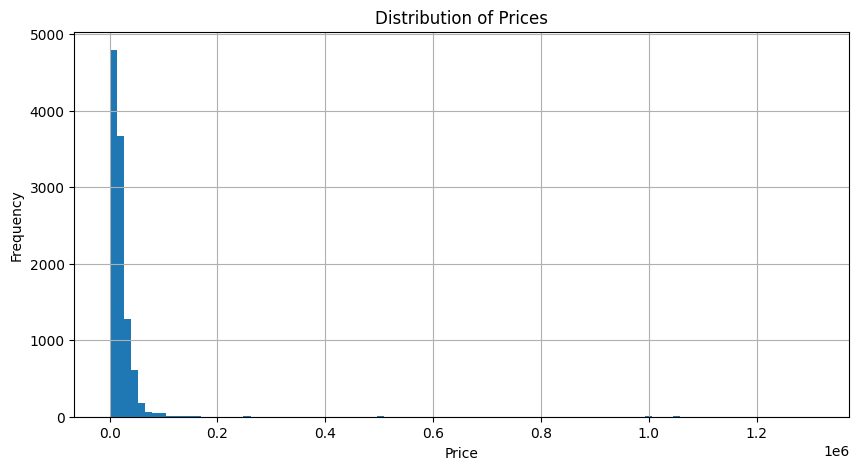

In [19]:
import matplotlib.pyplot as plt

listings_standard['price'].hist(bins=100, figsize=(10, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

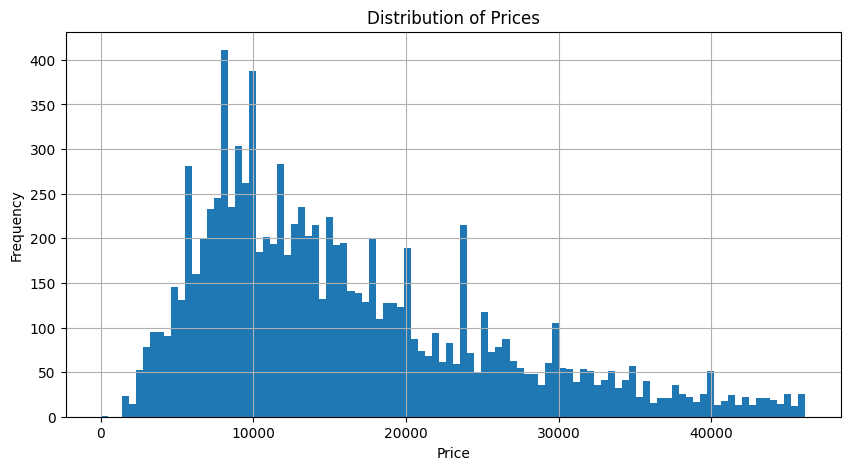

In [20]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = listings_standard['price'].quantile(0.25)
Q3 = listings_standard['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
listings_standard_no_outliers = listings_standard[(listings_standard['price'] >= lower_bound) & (listings_standard['price'] <= upper_bound)]

# Hist
listings_standard_no_outliers['price'].hist(bins=100, figsize=(10, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()


In [21]:
listings_standard_no_outliers.dropna(inplace=True)
listings_standard_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8001 entries, 0 to 10915
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8001 non-null   int64  
 1   name          8001 non-null   object 
 2   host_id       8001 non-null   int64  
 3   neighborhood  8001 non-null   object 
 4   price         8001 non-null   int64  
 5   longitude     8001 non-null   float64
 6   latitude      8001 non-null   float64
 7   rating        8001 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 562.6+ KB


<ipython-input-21-4f92a0aba9ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_standard_no_outliers.dropna(inplace=True)


In [22]:
# Export data and continue in Tableau
listings_standard_no_outliers.to_csv('exported_data_2.csv', index=False)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


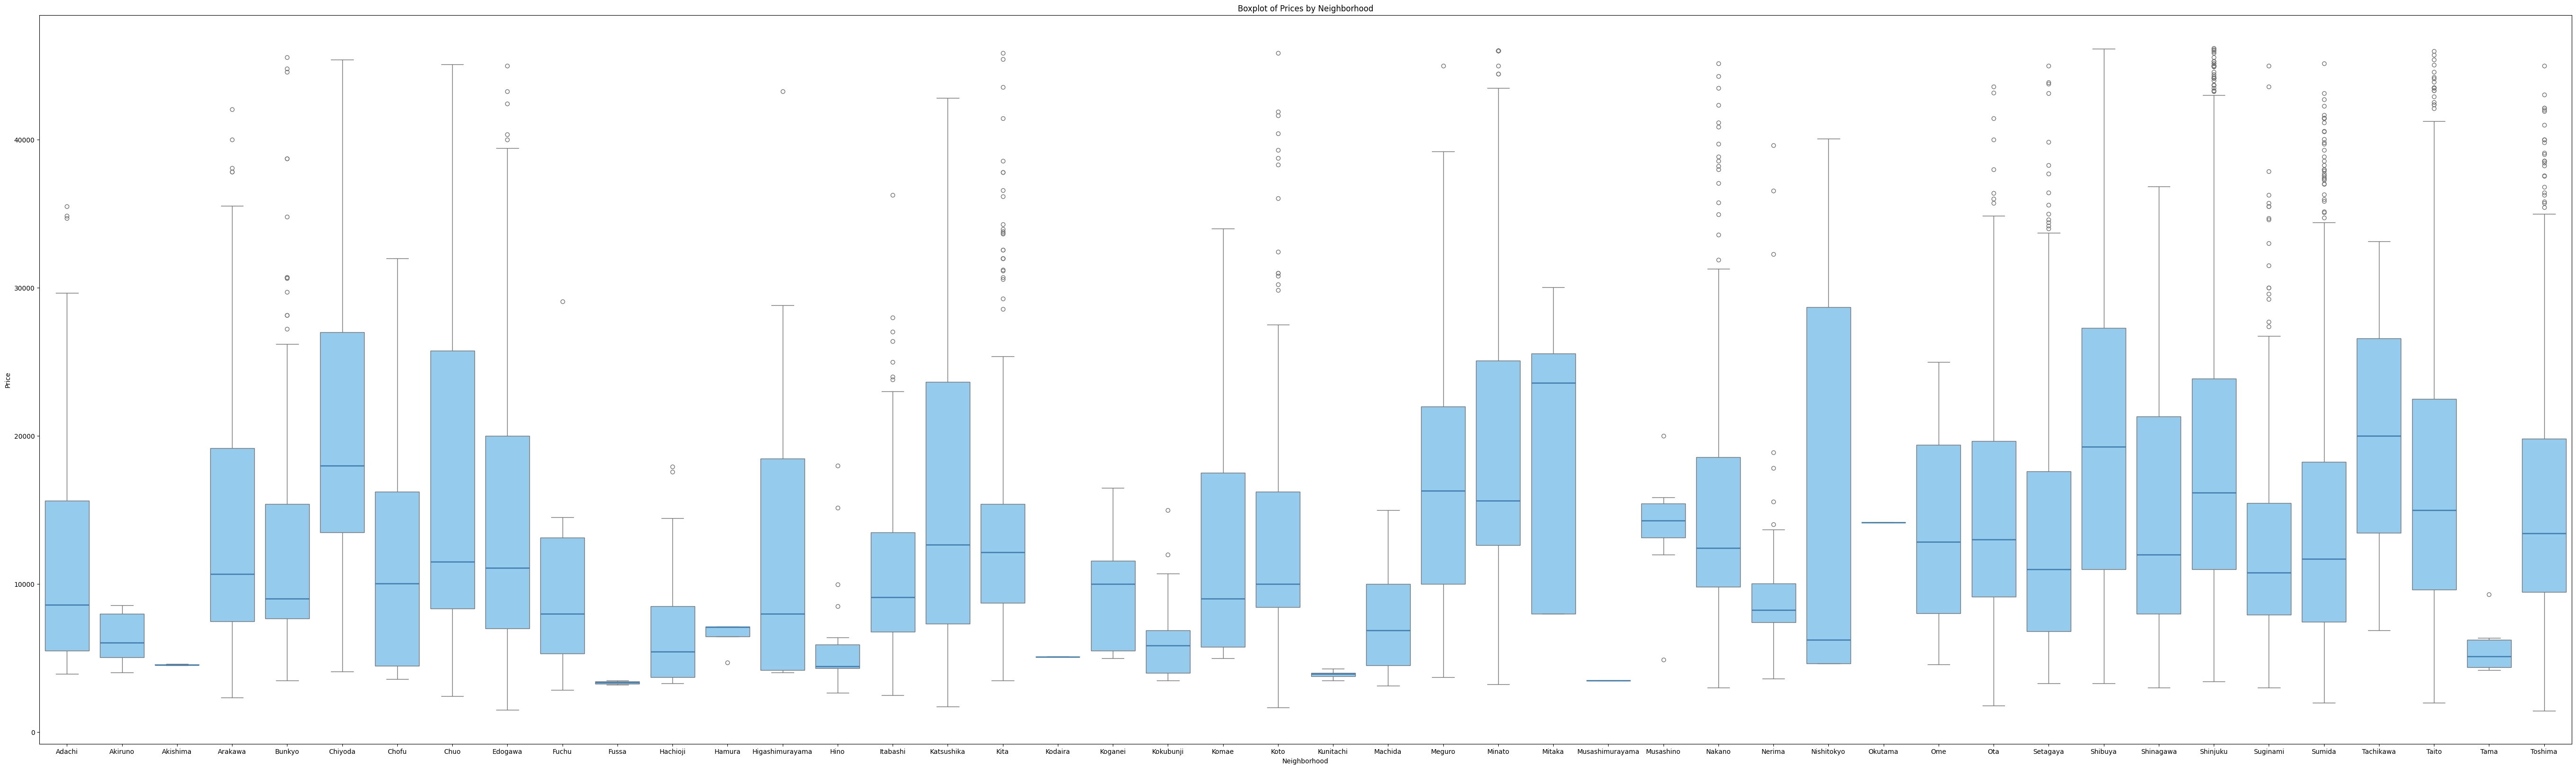

In [31]:
# Boxplot of prices based on neighborhood
import seaborn as sns

df_sorted = listings_standard_no_outliers.sort_values(by='neighborhood')
plt.figure(figsize=(len(df_sorted['neighborhood'].unique()) * 1.5, 20))

sns.boxplot(data=df_sorted, x='neighborhood', y='price',
            color='lightskyblue',
            medianprops={'color': 'steelblue', 'linewidth': 2})
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Boxplot of Prices by Neighborhood')
plt.show()